# ProsperLoan Data Exploration
## by Maxwell Ofoegbu

## Preliminary Wrangling

> This document explores a dataset containing prosperLoan and attributes for approximately 114000 enteries.

## Investigation Overview

The first paragraph of a reprinted Editors Note of a February 13, 2006 BusinessWeek article (found online) By Robert Hof reads as follows: E-Loan co-founder Chris Larsen’s online marketplace matches lenders and borrowers. Banks and “payday” outfits alike will be watching closely.

A decade ago, when Chris Larsen co-founded online loan broker E-Loan, he purposely took aim at traditional mortgage lenders, many of which he thought deceived borrowers and charged too much. Now, he intends to shake up a whole new swath of the financial services business. With Prosper Marketplace, a San Francisco startup he launched Feb. 13, (2006). Larsen aims to carve out a new business — this time by doing a number on check-cashing “payday” lenders that charge usurious interest rates.

Some of the most interesting things about this idea are that you, the borrower, actually decide what interest rate you are willing to pay, even though you will be told what the standard interest rate is. It is on the basis of the interest rate you offer, among other things, that willing lenders can make informed bidding. This document aims at showing a report of what the interest rate may actually look like by investigating some of those factors that could help predict the interest rate, also known as BorrowerRate, so as to enable the general audience make an informed decision.


## Dataset Overview

> The dataset consists of a total of 113937 prosperloan data entries with 80 features as follows (ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, istingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, BorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months,TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months,RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit,TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months,DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome,LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed,ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount,LoanOriginationDate, LoanOriginationQuarter, MemberKey,MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss,LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations ,InvestmentFromFriendsCount , InvestmentFromFriendsAmount and ,Investors). Most variables are numeric in nature, but the variables LoanStatus, ProsperRatingAlpha, ProsperRatingNumeric, and IncomeRange are ordered factor variables with the following levels..

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [5]:
# renaming some columns for consistensy
df=df.rename(columns = {'ListingCategory (numeric)':'ListingCategory', 'ProsperRating (numeric)':'ProsperRatingNumeric', 'ProsperRating (Alpha)':'ProsperRatingAlpha'})

In [6]:
# convert some colum features into ordered categorical types
ordinal_var_dict = {'CreditGrade':['AA','A','B', 'C', 'D','E', 'HR', 'NC'],
                    'ProsperRatingAlpha': ['AA','A',  'B','C', 'D',  'E', 'HR','NC'],
                    'ProsperRatingNumeric': [7,6,5,4,3,2,1],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999', '$0', 'Not employed','Not displayed']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

### What is the structure of your dataset?

> There are 113937 prosperloan data entries with 80 features (ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, istingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, BorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months,TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months,RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit,TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months,DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome,LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed,ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount,LoanOriginationDate, LoanOriginationQuarter, MemberKey,MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, 
LP_GrossPrincipalLoss,LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments,
PercentFunded, Recommendations  ,InvestmentFromFriendsCount  , InvestmentFromFriendsAmount and ,Investors). Most variables are numeric in nature, but the variables LoanStatus, ProsperRatingAlpha, ProsperRatingNumeric, and IncomeRange are ordered factor variables with the following levels.

(best) ——> (worst)


•	LoanStatus: Current,Completed, Chargedoff, Defaulted, Past Due (1-15 days),  Past Due (16-30 days), Past Due (31-60 days), Past Due (61-90 days), Past Due (91-120 days), Past Due (>120 days), FinalPaymentInProgress.

•	ProsperRatingAlpha:AA, A, B, C, D, E, HR, NC,         

•	ProsperRatingNumeric: 7,6,5,4,3,2,1

•	IncomeRange: $100,000+,  $75,000-99,999, $50,000-74,999, $25,000-49,999, $1-24,999, $0, Not employed, Not displayed,

•	ListingCategory: 20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0
      


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting interest rate (BorrowerRate) of the Loan in the dataset?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 	•	At this level of the analysis, I can only guess because I am new to the dataset. I think some-worth of thorough investigation would be ideal to help point to specific areas of interest, however, for the constraint of time and resources it would be ideal to limit my investigation; consequently, the following factors, among others, may be influencing the feature of interest--BorrowerRate:
•	BorrowerRate
•	LenderYield
•	EstimatedLoss
•	BorrowerAPR
•	LoanOriginalAmount
•	MonthlyLoanPayment
•	BorrowerState
•	ListingCategory
•	Investors 
•	ProsperRatingNumeric
•	ProsperRatingAlpha 
•	EmploymentStatus
•	IncomeRange
•	CreditGrade.

## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: BorrowerRate

In [7]:
df.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

**univariate plot No1: frequency distribution of BorrowerRate**  

The first paragraph of a reprinted Editors Note of a February 13, 2006 BusinessWeek article (found online) By Robert Hof reads as follows:
E-Loan co-founder Chris Larsen’s online marketplace matches lenders and borrowers. Banks and “payday” outfits alike will be watching closely.
A decade ago, when Chris Larsen co-founded online loan broker E-Loan, he purposely took aim at traditional mortgage lenders, many of which he thought deceived borrowers and charged too much. Now, he intends to shake up a whole new swath of the financial services business. With Prosper Marketplace, a San Francisco startup he launched Feb. 13, (2006). Larsen aims to carve out a new business — this time by doing a number on check-cashing “payday” lenders that charge usurious interest rates.
Some of the most interesting things about this idea are that you, the borrower, actually decide what interest rate you are willing to pay, even though you will be told what the standard interest rate is. It is on the basis of the interest rate you offer, among other things, that willing lenders can make informed decisions.
 This agrees with the unimodal frequency distribution of BorrowerRate shown below with a centre around 0.2. The distribution appears to be slightly in equilibrum however, one can still see that the Borrower’s Rate below the 0.2 mark is more significant than that above the centre.

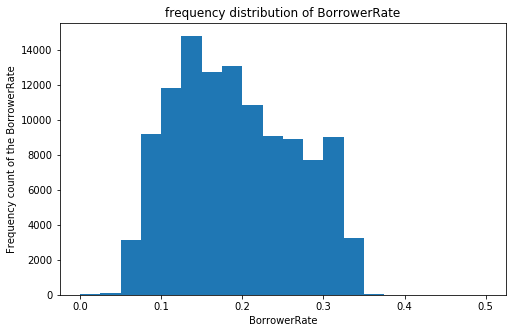

In [8]:
# start with a standard-scaled plot
binsize = .025
bins = np.arange(0, df['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.ylabel('Frequency count of the BorrowerRate')
plt.title("frequency distribution of BorrowerRate")
plt.show(); 

•	The frequency distribution of BorrowerRate is unimodal with a centre around 0.2. The distribution also shows some possible extremely small values at points slightly before the 0.1 mark on the left hand and before the 0.4 mark on the right hand.
•	The BorrowerRate below the 0.2 mark is more significant than that above the centre. 

**univariate plot No2: Frequency distribution of the LenderYield.**

In [9]:
df.LenderYield.values 

array([0.138 , 0.082 , 0.24  , ..., 0.205 , 0.2505, 0.0939])

As can be seen below, the lender's yield is predominantly on the left side of the distribution, in line with: “Larsen's aim to carve out a new business — this time by doing a number on check-cashing “payday” lenders that charge usurious interest rates.“

However, the fact that this distribution for LenderYield is partly right skewed with a peak half way between 0.1 and .2 and a larger portion of the distribution lying toward that left while on the far right are possibly very higher values may suggest the presence of outliers, that is, unusually high lender yield contrary to Larsen's proposed intention and therefore calls for further investigation.

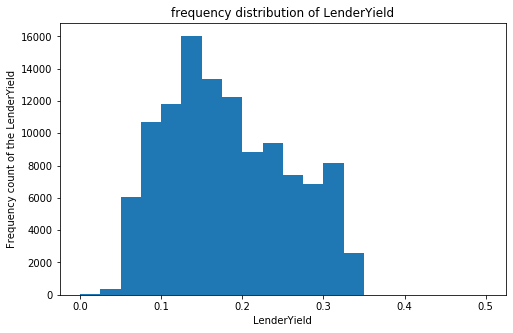

In [10]:
# start with a standard-scaled plot
binsize = .025
bins = np.arange(0, df['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LenderYield', bins = bins)
plt.xlabel('LenderYield')
plt.ylabel('Frequency count of the LenderYield')
plt.title("frequency distribution of LenderYield")
plt.show(); 

•	The distribution for LenderYield is partly right skwed with a peak half way between 0.1 and .2.A larger portion of the distribution lies toward the left. The far right is observed to have no values. This may suggest the presence of outliers and therefore calls for further investigation

In [11]:
df.EstimatedLoss.values 

array([   nan, 0.0249,    nan, ..., 0.1025, 0.085 , 0.0299])

This idea of Larsen is a bold one — so bold that it’s certain to draw naysayers who may wonder why anyone would lend to people they don’t know. So far, only one other company, Zopa, currently operating only in Britain, has tried something like it, according to what analysts say.

So you may want to ask: “what is/are the risk associated with this innovation?”

 Well you are not alone, according to Asaf Buchner a financial services analyst with JupiterResearch, he too at first was skeptical, but now, he thinks the notion could have legs if it follows the same virtuous cycle as eBay, which flourished as buyers flocked to where the sellers were and vice-versa.

 when you look at the distribution below, it shows you at a quick glance what the risk factor has been so far. This right skewed distribution shows that the losses so far have been very small, lying mainly toward the left. So this may be a pointer to safety for both lenders and borrowers.

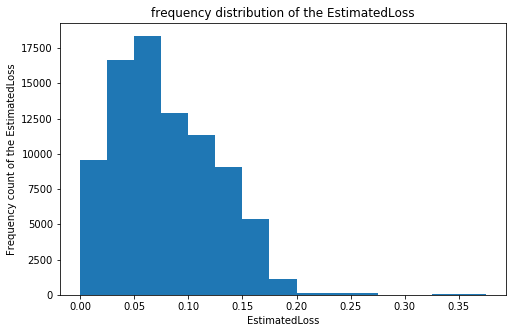

In [12]:
# start with a standard-scaled plot
binsize = .025
bins = np.arange(0, df['EstimatedLoss'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'EstimatedLoss', bins = bins)
plt.xlabel('EstimatedLoss')
plt.ylabel('Frequency count of the EstimatedLoss')
plt.title("frequency distribution of the EstimatedLoss")
plt.show(); 

•	The EstimatedLoss distribution for the EstimatedLoss is partly right skewed but draws our attention to further investigate the presence of outliers towards the far right of the distribution.

**univariate plot No3: frequency distribution of BorrowerAPR** 

•	The BorrowerAPR known as the Borrower annual percentage Rate (APR) for the loan, is a suspected a possible influencer on the BorrowerRate (interest rate) and there is worth investigating 

In [13]:
df.BorrowerAPR.values 

array([0.16516, 0.12016, 0.28269, ..., 0.23984, 0.28408, 0.13189])

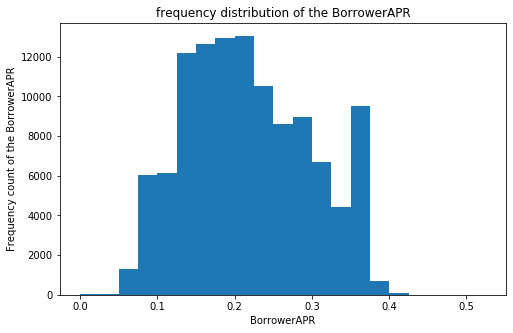

In [14]:
binsize = .025
bins = np.arange(0, df['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency count of the BorrowerAPR')
plt.title("frequency distribution of the BorrowerAPR")
plt.show(); 

•	the distribution of the BorrowerAPR is unimodal and  very similar to that observed from the distribution of BorrowerRate with a centre around 0.2. The distribution also shows some possible extremely small values at points slightly before the 0.1 mark on the left hand and before the 0.4 mark on the right hand.

**univariate plot No4: frequency distribution of LoanOriginalAmount** 

•	This should definitely be one of the factors that decides the interest rate and is there going to be investigated.

In [15]:
df.LoanOriginalAmount.values 

array([ 9425, 10000,  3001, ..., 10000, 15000,  2000], dtype=int64)

Larsen essentially hopes to create an eBay style loan marketplace known as ProsperLoan whose job is to match people who need small loans, but can’t get them from traditional banks, with willing lenders.

As seen in the distribution of the so called LoanOriginalAmount, it is clear that this Loan system known as Prosper is limited as to the extent of loan she could give to borrowers at any specific time.

 The initial plot of the LoanOriginalAmount shows some immediate points of attention. you would notice sudden spikes and some other very high figures in the far right. This worth taking a bit of time to identify these outliers because they can influence the true result in a distribution.

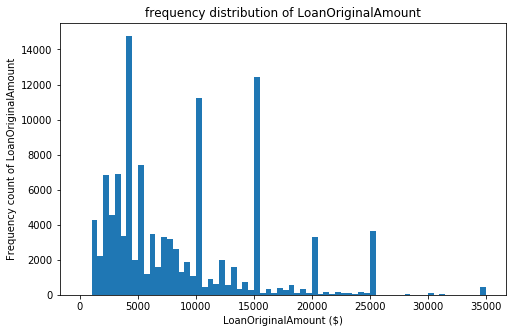

In [16]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('Frequency count of LoanOriginalAmount')
plt.title("frequency distribution of LoanOriginalAmount")
plt.show(); 

•	The initial plot of the LoanOriginalAmount shows some immediate points of attention. On the LoanOriginalAmount you would notice sudden spikes and some other very high figures in the far right. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data. I have reserved the last part of my univariate analysis to look into the treatment of outliers.

**univariate plot No5: frequency distribution of MonthlyLoanPayment** 

•	Here we would want take a look at the distribution of the MonthlyLoanPayment, I personally don’t see any reason for which the monthly payment should affect the interest rate, however, I’ll be taking a look nonetheless.

In [17]:
df.MonthlyLoanPayment.values 

array([330.43, 318.93, 123.32, ..., 273.35, 449.55,  64.9 ])

The distribution below also known as MonthlyLoanPayment shows us the distribution of what Borrowers could get as loan on a given month. One may expect that the more the amount paid montly the more the Borrower'rate or interest rate.

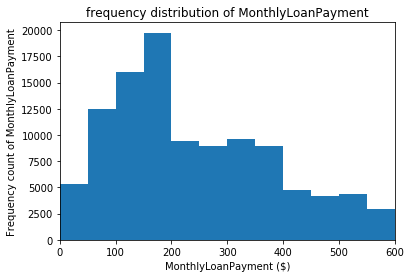

In [18]:
bins =  np.arange(0, df['MonthlyLoanPayment'].max()+50, 50)
plt.hist(data =df, x='MonthlyLoanPayment', bins=bins)
plt.xlim((0,600));
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylabel('Frequency count of MonthlyLoanPayment')
plt.title("frequency distribution of MonthlyLoanPayment")
plt.show();

•	The MonthlyLoanPayment appear partly right skewed with a lot of MonthlyLoanPayment in the lower end. The smaller the MonthlyLoanPayment the more payment is made.

**Let’s now take a look at some of the categorical features in the dataset**

**univariate plot No6: Frequency distribution of the BorrowerState.**

•	Next I will be looking at the distributions of the BorrowerState. This would give me an over-view of what each State looks like with respect to her borrowing lifestyle as well as present more guidelines for more investigation. 
•	The reason for choosing to investigate the BorrowerState is because one should naturally expect the BorrowerRate to be influenced by the number of those seeking for loan, which, in line with the ideology for setting up ProsperLoan, should not be the case. However, you don’t take my word for it, it is better to investigate things out.

In [19]:
df.BorrowerState.values 

array(['CO', 'CO', 'GA', ..., 'TX', 'GA', 'NY'], dtype=object)

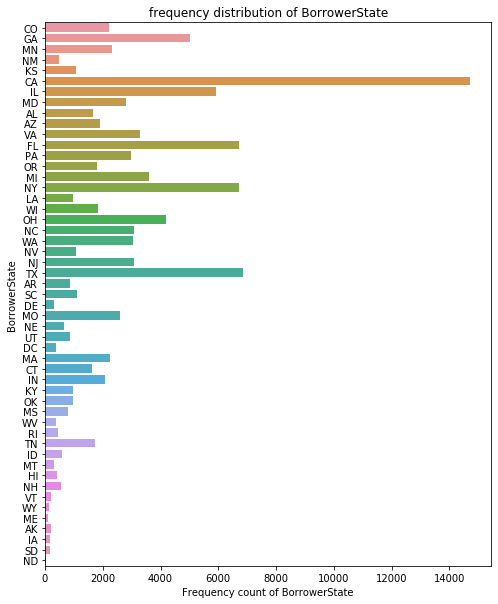

In [20]:
sb.countplot(data= df, y= 'BorrowerState');
fig = plt.gcf()
fig.set_size_inches(8, 10)
plt.xlabel('Frequency count of BorrowerState')
plt.title("frequency distribution of BorrowerState")
plt.show() ;

•	For better visibility I don't have a good reason right now to associate each BorrowerState with a different color. It's better to start by plotting everything in one color to avoid being distracted. I will also place the BorrowerState on the x-axis. To make things clearly spelt out I will have to sort the BorrowerState in order. Usually this could be done either by hard coding or programmatically.
•	A better approach is to write some code to obtain that order programmatically. The pandas series function value counts is valuable here. This function counts the frequency of each unique value in the series and then sorts them in descending order. In order to get the bar order, we want the index values and then, store them in a variable. We pass this to the order parameter in order to get the sorted bar chart as shown below:

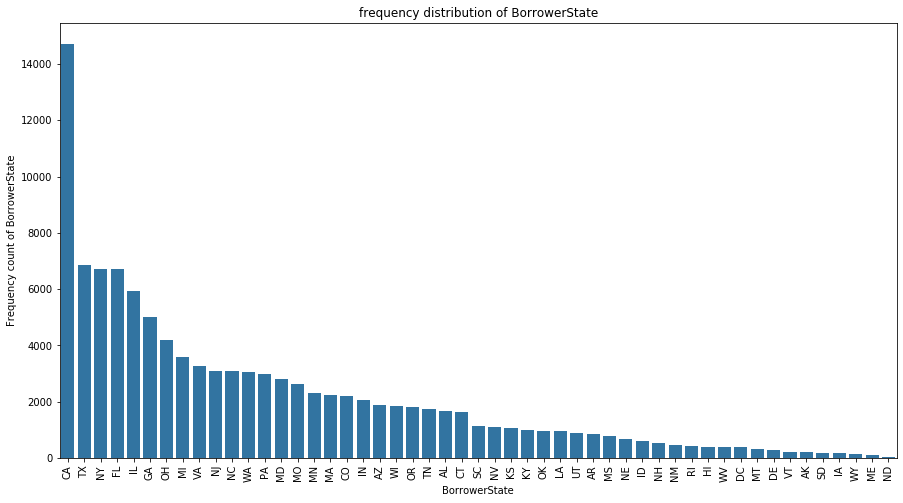

In [21]:
Borrower_State_order =df['BorrowerState'].value_counts().index
color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'BorrowerState',color=color_base, order =Borrower_State_order);
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.ylabel('Frequency count of BorrowerState')
plt.title("frequency distribution of BorrowerState")
plt.xticks(rotation=90);

•	We can see from the plot that California is the most BorrowerState followed by three other States.  This frequency distribution shows that California is the most BorrowerState with Texas, New York, Florida as second most BorrowerState but just half way of California.

**univariate plot No7: frequency distribution of ListingCategory**

•	I think it is also worth the effort to examine the various Loan Categories, perhaps the interest rate charged for each loan may be influenced by the category to which the loan fall into. Again, we don’t expect this to be the case but you never can tell!
•	To do this I’ll be creating a bar chart on ‘ListingCategory’, a categorical feature in the dataset. I would like to know how many loan categories there are in all as well as the frequency distribution of each category and later on to find out if there are varying BorrowerRate per category.

In [22]:
df.ListingCategory.values             

array([0, 2, 0, ..., 1, 2, 1], dtype=int64)

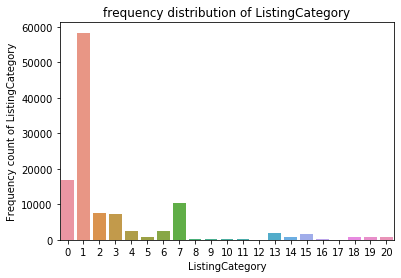

In [23]:
sb.countplot(data= df, x= 'ListingCategory');
plt.ylabel('Frequency count of ListingCategory');
plt.title("frequency distribution of ListingCategory");

•	For the same reason as the previous it’s better to plot everything in one color. I presume the listing categories is a categorical ordinal variable as depicted by information in the Google docs. And so its inherent order is important and not necessarily the order in which the values occur.  I will not be ordering the ListingCategory like in the previous case.

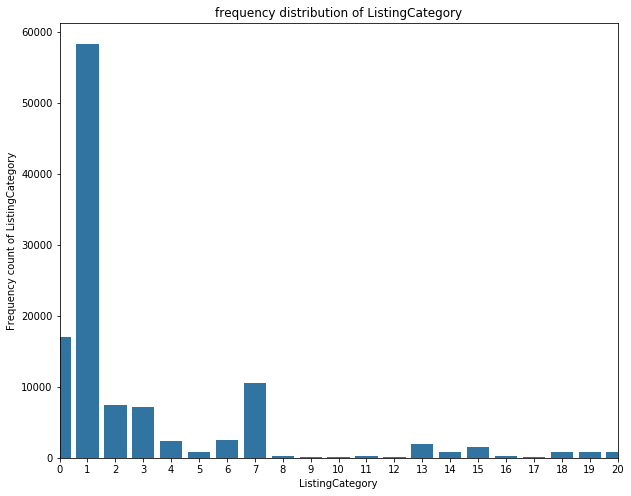

In [24]:
color_1 = sb.color_palette()[0]
sb.countplot(data= df, x= 'ListingCategory', color=color_1)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.xlim([0, 20])
plt.xlabel('ListingCategory')
plt.ylabel('Frequency count of ListingCategory');
plt.title("frequency distribution of ListingCategory")
plt.show();

•	Seeing that the ListingCategory represents various loan category, the category number 1 which, according to the Google Docs, represents Dept Consolidation is ranked highest followed by category zero. The BorrowerRate associated with each of these categories is worth further investigation in the bi-variate and possibly in the multivariate exploration.  

**univariate plot No8: frequency distribution of Investors** 

•	One may be tempted to think that the number of those whiling to loan money to borrowers can also determine how the interest rate is charged, this is natural. Therefore I will be examining the distribution of investors as well.

In [25]:
df.Investors.values   

array([258,   1,  41, ..., 119, 274,   1], dtype=int64)

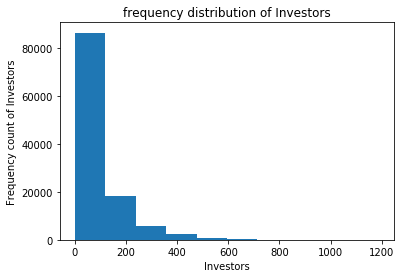

In [26]:
plt.hist(data =df, x='Investors')
plt.xlabel('Investors')

plt.ylabel('Frequency count of Investors')
plt.title("frequency distribution of Investors")
plt.show();

To further abate your fears, Larsen’s idea is such that no one lender takes the full responsibility of meeting the demand of any one borrower but that lenders can offer up to $50 and above. So this is why the distribution below shows that investors or lenders are mainly contributing very small amount individually.

The distribution of Investors values appears right skewed (long tailed), with relatively few points above 400 in value and it can be seen that investors are in terms with the ideology of Larsen because he also aims at reducing risk and this is exactly what we see, with many investors favoring low loan. There are basically few investors willing to take the risk of loaning money beyond $500.

 So, basically People who want to loan money bid in increments starting at $50, usually just for a portion of the loan, to reduce risk. One of the most interesting things about this loan system is that even though borrowers are told what the standard interest rate is, yet they are the ones who actually decide what interest rate they are willingly to pay and it is on that basis that lenders bid for such loans, however, in addition to deciding the interest rate one is willing to pay for a given loan, one is also required to provide credit grades and other criteria. so what we see is a low interest rate being favored by many lenders who will individually contribute small portions of the entire loan thus the distribution below.

Can you now relate to the previoue distribution on EstimatedLoss?

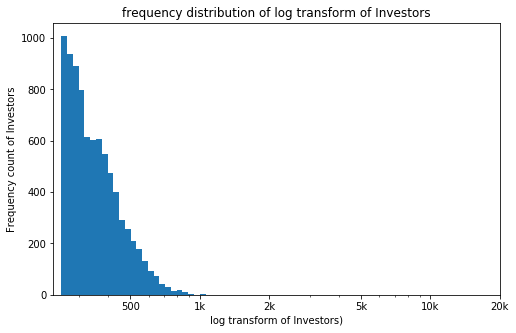

In [27]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['Investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('log transform of Investors)')
plt.ylabel('Frequency count of Investors');
plt.title("frequency distribution of log transform of Investors");
plt.show();

•	The distribution of Investors values appears right skewed (long tailed), with relatively few points above 400 in value but there isn't a lot of detail beyond the 400 value. By default, matplotlib will split the data into 10 bins, which is usually too few but in this case too small because we would need to zoom in. In addition, the bin boundaries are not particularly aligned with the tick marks making interpretation trickier. However, in the log transform plot it can be seen that investors are in terms with the ideology of ProsperLoan because essentially, “Larsen hopes to create an eBay style loan marketplace. Prosper matches people who need small loans, but can’t get them from traditional banks, with willing lenders “ 
•	This is exactly what we see, with many investors favoring low loan. There are basically few investors willing to take the risk of loaning money beyond $500.  However, it would be worth the effort to see what the corresponding interest rate.


**univariate plot No9: frequency distribution of ProsperRatingNumeric**

•	The ProsperRating (numeric) is the ProsperRatIng assigned at the time the listing was created. It is a categorical ordinal variable. We can also examine its relationship with the BorrowerRate. 

In [28]:
df.ProsperRatingNumeric.values  

[NaN, 6, NaN, 6, 3, ..., 4, 6, 3, 4, 6]
Length: 113937
Categories (7, int64): [7 < 6 < 5 < 4 < 3 < 2 < 1]

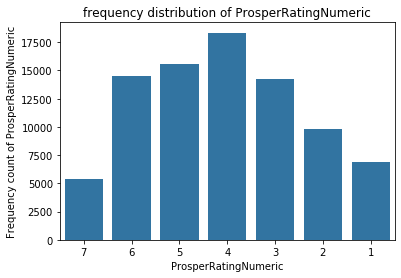

In [29]:
color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'ProsperRatingNumeric', color=color_base);
plt.ylabel('Frequency count of ProsperRatingNumeric');
plt.title("frequency distribution of ProsperRatingNumeric");
plt.show();

•	We see a unimodal distribution for the ProsperRating (numeric) with a center at around 4 with the upper half, from rating number 4, dominating the range. however, we could notice a sudden count drop in the prosper rating of 7. This implies there are only a few numbers of persons with a highest ProsperRating. There are generally more people with average ProsperRating of 4. It will worth the effort to see how one's ProsperRating could influence one's interest rate

**univariate plot No10: frequency distribution of ProsperRatingAlpha**

In [30]:
df.ProsperRatingAlpha.values  

[NaN, A, NaN, A, D, ..., C, A, D, C, A]
Length: 113937
Categories (8, object): [AA < A < B < C < D < E < HR < NC]

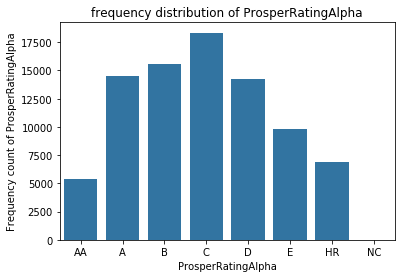

In [31]:
color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'ProsperRatingAlpha', color=color_base);
plt.ylabel('Frequency count of ProsperRatingAlpha');
plt.title("frequency distribution of ProsperRatingAlpha");
plt.show();

•	The ProsperRatingAlpha is defined as the ProsperRating assigned at the time t he listing was created between AA-HR. We can notice a slightly opposite distribution between the ProsperRatingNumeric and ProsperRatingAlpha with the grater number of people in the c-rating. We could notice that the NC is zero which suggests the absence of this class of rating within the  ProsperRatingAlpha.

**univariate plot No11:  frequency distribution of EmploymentStatus**

In [32]:
df.EmploymentStatus.values 

array(['Self-employed', 'Employed', 'Not available', ..., 'Employed',
       'Full-time', 'Employed'], dtype=object)

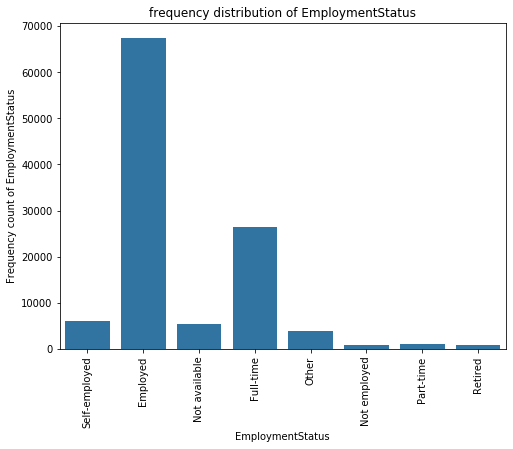

In [33]:
color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'EmploymentStatus', color=color_base);
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.xticks(rotation=90);
plt.ylabel('Frequency count of EmploymentStatus');
plt.title("frequency distribution of EmploymentStatus")
plt.show();

•	The distribution shows that a greater number of the people have some kind of employment with the fulltime workers greater than that of the self-employed. Should we expect the interest rate to vary based on ones employment status? 

**univariate plot No12 frequency distribution of IncomeRange**

In [34]:
df.IncomeRange.values    

[$25,000-49,999, $50,000-74,999, Not displayed, $25,000-49,999, $100,000+, ..., $50,000-74,999, $75,000-99,999, $25,000-49,999, $25,000-49,999, $50,000-74,999]
Length: 113937
Categories (8, object): [$100,000+ < $75,000-99,999 < $50,000-74,999 < $25,000-49,999 < $1-24,999 < $0 < Not employed < Not displayed]

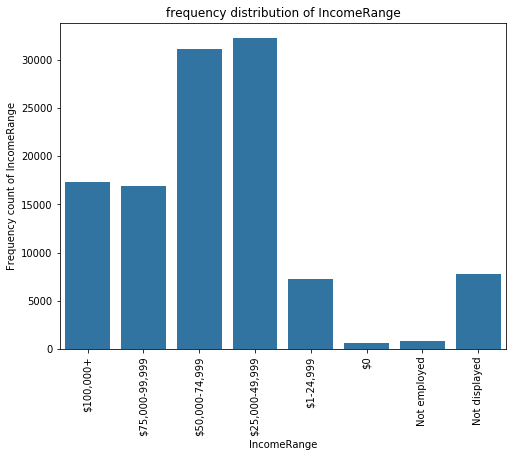

In [35]:
color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'IncomeRange', color=color_base);
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.xticks(rotation=90);
plt.ylabel('Frequency count of IncomeRange');
plt.title("frequency distribution of IncomeRange")
plt.show();


•	The distribution for the IncomeRange shows that the greater part of the population lies within the $(25,000 -49,999) to (50,000 -79,999) range.
•	There are also a small number of unemployed people in the population. However, there is also a moderate size group whose employment status is not ascertain.

**univariate plot No13: frequency distribution of CreditGrade** 

In [36]:
df.CreditGrade.values    

[C, NaN, HR, NaN, NaN, ..., NaN, NaN, NaN, NaN, NaN]
Length: 113937
Categories (8, object): [AA < A < B < C < D < E < HR < NC]

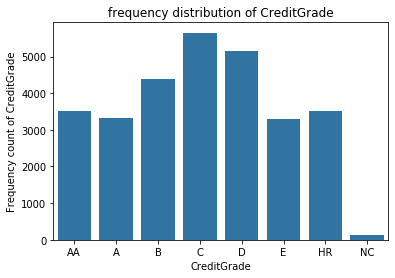

In [37]:
color_base = sb.color_palette()[0]
sb.countplot(data= df, x= 'CreditGrade', color=color_base);
plt.ylabel('Frequency count of CreditGrade');
plt.title("frequency distribution of CreditGrade")
plt.show();

•	The distribution for the CreditGrade shows a unimodal distribution with the C grade being highest. Just as said earlier, these distributions are confirming that the greater part of loan seekers fall into the C-group. However, there is also a significant number of people in the AA, A,B,E,HR group. The distribution shows a steep drop in the number of loan seekers occupying the NC group.

**REMOVING OUTLIERS** 

In [38]:
# here i will be selecting the numeric columns that are part of my target features so as to remove outliers 
dfselect = df[['BorrowerRate', 'LenderYield','EstimatedLoss','BorrowerAPR','LoanOriginalAmount','MonthlyLoanPayment']]
dfselectdescribe = dfselect.describe([.25,.75,.9,.95,.99])
dfselectdescribe

,BorrowerRate,LenderYield,EstimatedLoss,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113937.000000,84853.000000,113912.000000,113937.00000,113937.000000
mean,0.192764,0.182701,0.080306,0.218828,8337.01385,272.475783
std,0.074818,0.074516,0.046764,0.080364,6245.80058,192.697812
min,0.000000,-0.010000,0.004900,0.006530,1000.00000,0.000000
25%,0.134000,0.124200,0.042400,0.156290,4000.00000,131.620000
50%,0.184000,0.173000,0.072400,0.209760,6500.00000,217.740000
75%,0.250000,0.240000,0.112000,0.283810,12000.00000,371.580000
90%,0.309900,0.299900,0.147500,0.345770,15000.00000,535.910000
95%,0.317700,0.307700,0.165000,0.357970,20000.00000,634.040000
99%,0.350000,0.340000,0.183000,0.374530,25000.00000,886.060000


In [39]:
percentile = dfselectdescribe.loc['99%']
dfselectLim = dfselect[dfselect<=percentile]
dfselectLim.max()

BorrowerRate              0.35000
LenderYield               0.34000
EstimatedLoss             0.18300
BorrowerAPR               0.37453
LoanOriginalAmount    25000.00000
MonthlyLoanPayment      886.06000
dtype: float64

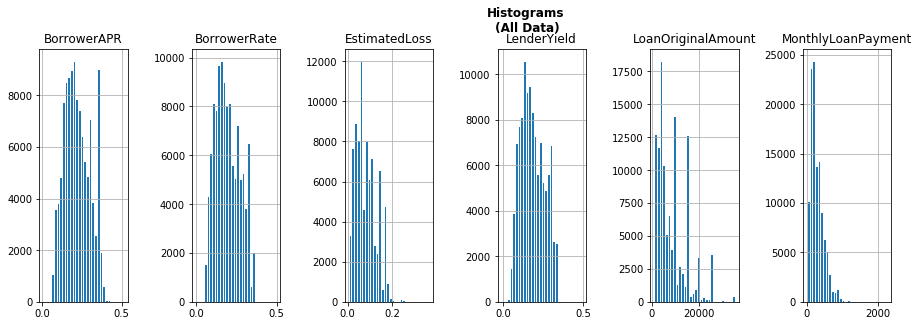

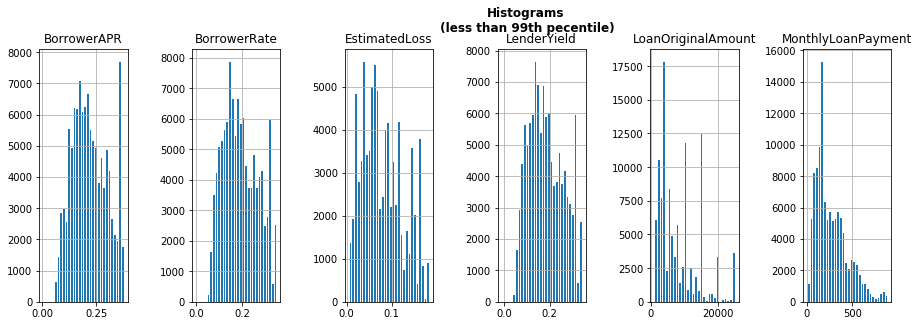

In [40]:
dfselect.hist(bins =30, edgecolor ="white",layout =(1,7), figsize =[14.70, 4.27]);
plt.suptitle("Histograms\n (All Data)", y=1.05, weight ="bold")
plt.tight_layout()
plt.show()


dfselectLim.hist(bins =30, edgecolor ="white",layout =(1,7), figsize =[14.70, 4.27]);
plt.suptitle("Histograms\n (less than 99th pecentile)", y=1.05, weight ="bold")
plt.tight_layout()
plt.show()

In [41]:
dfselectLim.head()

,BorrowerRate,LenderYield,EstimatedLoss,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment
0,0.1580,0.1380,NaN,0.16516,9425.0,330.43
1,0.0920,0.0820,0.0249,0.12016,10000.0,318.93
2,0.2750,0.2400,NaN,0.28269,3001.0,123.32
3,0.0974,0.0874,0.0249,0.12528,10000.0,321.45
4,0.2085,0.1985,0.0925,0.24614,15000.0,563.97


In [42]:
# in order to reintegrate my categorical variables i will need to isolate the columns i don't need from the original df dataset
df.drop(df.iloc[:, np.r_[:3, 4:7, 10:11, 12:13, 15:15, 18:19, 20:21, 21:47, 48:49, 49:62, 62:63,64:67,68:80]], inplace =True, axis =1)


In [43]:
df.head()

,CreditGrade,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,ProsperRatingNumeric,ProsperRatingAlpha,ProsperScore,ListingCategory,BorrowerState,EmploymentStatus,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors
0,C,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,0,CO,Self-employed,"$25,000-49,999",9425,330.43,258
1,NaN,0.12016,0.0920,0.0820,0.0249,6,A,7.0,2,CO,Employed,"$50,000-74,999",10000,318.93,1
2,HR,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,0,GA,Not available,Not displayed,3001,123.32,41
3,NaN,0.12528,0.0974,0.0874,0.0249,6,A,9.0,16,GA,Employed,"$25,000-49,999",10000,321.45,158
4,NaN,0.24614,0.2085,0.1985,0.0925,3,D,4.0,2,MN,Employed,"$100,000+",15000,563.97,20


In [44]:
# change the column names of some of df dataset 
df=df.rename(columns = {'BorrowerAPR':'Borrower_APR', 'BorrowerRate':'Borrower_Rate', 'LenderYield':'Lender_Yield', 'EstimatedLoss':'Estimated_Loss', 'LoanOriginalAmount':'LoanOriginal_Amount', 'MonthlyLoanPayment':'MonthlyLoan_Payment'})

In [45]:
#reset the index of df and drop unwanted column
df.reset_index()
df.drop(['ProsperScore'], axis=1, inplace=True)

In [46]:
#reset index of dfselectLim  for a smooth cocatenation with df 
dfselectLim.reset_index()

,index,BorrowerRate,LenderYield,EstimatedLoss,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment
0,0,0.1580,0.1380,NaN,0.16516,9425.0,330.43
1,1,0.0920,0.0820,0.0249,0.12016,10000.0,318.93
2,2,0.2750,0.2400,NaN,0.28269,3001.0,123.32
3,3,0.0974,0.0874,0.0249,0.12528,10000.0,321.45
4,4,0.2085,0.1985,0.0925,0.24614,15000.0,563.97
...,...,...,...,...,...,...,...
113932,113932,0.1864,0.1764,0.0699,0.22354,10000.0,364.74
113933,113933,0.1110,0.1010,0.0200,0.13220,2000.0,65.57
113934,113934,0.2150,0.2050,0.1025,0.23984,10000.0,273.35
113935,113935,0.2605,0.2505,0.0850,0.28408,15000.0,449.55


In [47]:
#concatenate df and dfselectLim along axis =1
df_new = pd.concat([df, dfselectLim], axis =1)

In [48]:
#now we have a dataset free of outliers as df_new
df_new.head()

,CreditGrade,Borrower_APR,Borrower_Rate,Lender_Yield,Estimated_Loss,ProsperRatingNumeric,ProsperRatingAlpha,ListingCategory,BorrowerState,EmploymentStatus,IncomeRange,LoanOriginal_Amount,MonthlyLoan_Payment,Investors,BorrowerRate,LenderYield,EstimatedLoss,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment
0,C,0.16516,0.1580,0.1380,NaN,NaN,NaN,0,CO,Self-employed,"$25,000-49,999",9425,330.43,258,0.1580,0.1380,NaN,0.16516,9425.0,330.43
1,NaN,0.12016,0.0920,0.0820,0.0249,6,A,2,CO,Employed,"$50,000-74,999",10000,318.93,1,0.0920,0.0820,0.0249,0.12016,10000.0,318.93
2,HR,0.28269,0.2750,0.2400,NaN,NaN,NaN,0,GA,Not available,Not displayed,3001,123.32,41,0.2750,0.2400,NaN,0.28269,3001.0,123.32
3,NaN,0.12528,0.0974,0.0874,0.0249,6,A,16,GA,Employed,"$25,000-49,999",10000,321.45,158,0.0974,0.0874,0.0249,0.12528,10000.0,321.45
4,NaN,0.24614,0.2085,0.1985,0.0925,3,D,2,MN,Employed,"$100,000+",15000,563.97,20,0.2085,0.1985,0.0925,0.24614,15000.0,563.97


In [49]:
# i will drop the renamed columns of df so that my df_new will retain its the original column names  
df_new.drop(['Borrower_APR', 'Borrower_Rate','Lender_Yield','Estimated_Loss','MonthlyLoan_Payment', 'LoanOriginal_Amount'], axis=1, inplace=True)

In [50]:
df_new.head()

,CreditGrade,ProsperRatingNumeric,ProsperRatingAlpha,ListingCategory,BorrowerState,EmploymentStatus,IncomeRange,Investors,BorrowerRate,LenderYield,EstimatedLoss,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment
0,C,NaN,NaN,0,CO,Self-employed,"$25,000-49,999",258,0.1580,0.1380,NaN,0.16516,9425.0,330.43
1,NaN,6,A,2,CO,Employed,"$50,000-74,999",1,0.0920,0.0820,0.0249,0.12016,10000.0,318.93
2,HR,NaN,NaN,0,GA,Not available,Not displayed,41,0.2750,0.2400,NaN,0.28269,3001.0,123.32
3,NaN,6,A,16,GA,Employed,"$25,000-49,999",158,0.0974,0.0874,0.0249,0.12528,10000.0,321.45
4,NaN,3,D,2,MN,Employed,"$100,000+",20,0.2085,0.1985,0.0925,0.24614,15000.0,563.97


This check captures not only the outliers that were identified above, but a number of other points that had conflicting information. For safety, I have removed all of these inconsistent points from the data. Then, I'll recreate the plots of df and df_new.

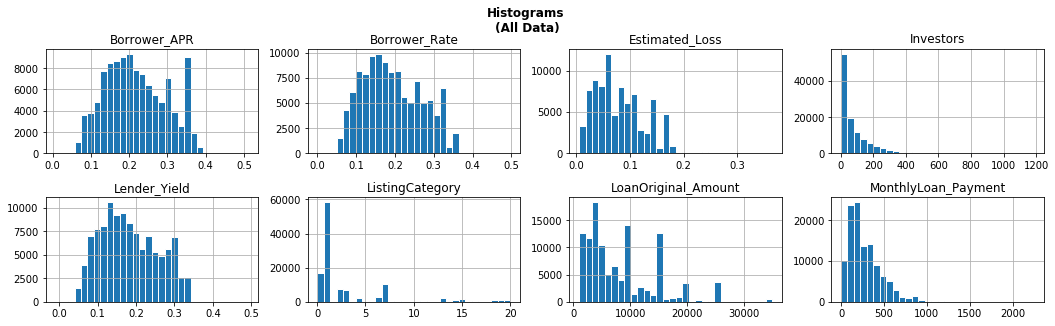

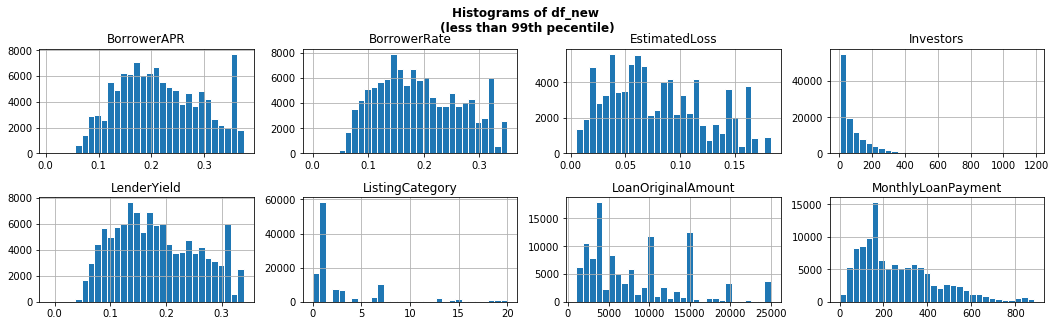

In [51]:
df.hist(bins =30, edgecolor ="white",layout =(2,4), figsize =[14.70, 4.27]);
plt.suptitle("Histograms\n (All Data)", y=1.05, weight ="bold")
plt.tight_layout()
plt.show()


df_new.hist(bins =30, edgecolor ="white",layout =(2,4), figsize =[14.70, 4.27]);
plt.suptitle("Histograms of df_new\n (less than 99th pecentile)", y=1.05, weight ="bold")
plt.tight_layout()
plt.show()

with the outliers removed, we can see the new distributions of the features under considerations. it appears the outliers had significant effect all on all the variables undeer consideration as these distributions show remarkable difference from the original df. however, we can notice there is no significant change in the distributions of investors.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> •	The frequency distribution of BorrowerRate was observed to be unimodal with a centre around 0.2. The distribution also showed some possible extremely small values at points slightly before the 0.1 mark on the left hand and before the 0.4 mark on the right hand. It was observed that the BorrowerRate below the 0.2 mark is more significant than that above the centre. 
•	The distribution for LenderYield was observed to be partly right skewed with a peak half way between 0.1 and .2.A larger portion of the distribution lies toward the left. The far right is observed to have no values. This may suggest the presence of outliers and therefore necessitated for further investigation down the line.
•	The distribution for the EstimatedLoss was partly right skewed but drew my attention to further investigate the presence of outliers towards the far right of the distribution.
•	The distribution of the BorrowerAPR was observed to be unimodal and very similar to that observed from the distribution of BorrowerRate with a centre around 0.2. The distribution also showed some possible extremely small values at points slightly before the 0.1 mark on the left hand and before the 0.4 mark on the right hand.
•	The initial plot of the LoanOriginalAmount showed some immediate points of attention. On the LoanOriginalAmount you would notice sudden spikes and some other very high figures in the far right which was worth taking a bit of time to identify possible outliers and see if they need to be filtered out of the data.
•	The MonthlyLoanPayment appeared partly right skewed with a lot of MonthlyLoanPayment in the lower end. It was observed that the smaller the MonthlyLoanPayment the more payment was made.
•	We could see from the plot that California is the most BorrowerState followed by three other States namely, Texas, New York and Florida which were just half way of California.
•	Seeing that the ListingCategory represents various loan category, the category number 1 which, according to the Google Docs, represents Dept Consolidation was ranked highest followed by category zero. The BorrowerRate associated with each of these categories will be further investigation in the bi-variate distribution and possibly in the multivariate exploration. 
•	The distribution of Investors values appeared right skewed (long tailed), with relatively few points above 400 in value but there isn't a lot of detail beyond the 400 value. In addition, the bin boundaries were  not particularly aligned with the tick marks which made interpretation trickier. However, in the log transform plot it was seen that investors are in terms with the ideology of ProsperLoan because essentially, “Larsen hopes to create an eBay style loan marketplace. Prosper matches people who need small loans, but can’t get them from traditional banks, with willing lenders “This was exactly what was observed, with many investors favoring low loan. There are basically few investors willing to take the risk of loaning money beyond $500.
•	We see a unimodal distribution for the ProsperRating (numeric) with a center at around 4, with the upper half, from rating number 4, dominating the range. However, we could notice a sudden count drop in the prosper rating of 7. This implied there are only a few numbers of persons with a highest ProsperRating. There are generally more people with average ProsperRating of 4. 

•	The ProsperRatingAlpha is defined as the ProsperRating assigned at the time the listing was created between AA-HR. We can notice a slightly opposite distribution between the ProsperRatingNumeric and ProsperRatingAlpha with the greater number of people in the c-rating. We noticed that the NC is zero which suggests the absence of this class of rating within the ProsperRatingAlpha.
•	The distribution showed that a greater number of the people have some kind of employment with the fulltime-workers kind greater than that of the self-employed kind.

•	The distribution for the IncomeRange showed that the greater part of the population lies within the $(25,000 -49,999) to (50,000 -79,999) range. There were also a small number of unemployed people in the population. However, there is also a moderate size group whose employment status was not ascertain.

•	The distribution for the CreditGrade showed a unimodal characteristic with the C grade being the highest. 
•	Just as said earlier, these distributions are in conformity that the greater part of loan seekers fall into the C-group. However, there is also a significant number of people in the AA, A,B,E,HR group. The distribution showed a steep drop in the number of loan seekers occupying the NC group.

•	For better visibility I didn't have a good reason to associate each feature with a different color. It was better to plot everything in one color to avoid being distracted!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>•	With the outliers removed, I observed the new distributions of the features under considerations. It appears the outliers had significant effect all on all the variables under consideration as these distributions show remarkable difference from the original df. However, we can notice there is no significant change in the distributions of investors.

•	There were needs to rename certain columns as well as convert a few categorical columns into ordered categorical type. One of the major changes I had to perform has to do with restructuring the dataset as my local machine could no t handle the volume of coca tena ting the df and df_new. This unique restructuring was implemented by the use of numpy!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

To start off with, I want to look at the pairwise correlations present between features in the data

In [52]:
numeric_vars = ['BorrowerRate', 'LenderYield', 'EstimatedLoss','BorrowerAPR', 'LoanOriginalAmount','MonthlyLoanPayment','ListingCategory','Investors']
categoric_vars1 = ['BorrowerState','ListingCategory']
categoric_vars2 =['Investors','ProsperRatingNumeric']
categoric_vars_new1 = ['ProsperRatingAlpha','EmploymentStatus']
categoric_vars_new2 =['IncomeRange']
categoric_vars_new3 =['CreditGrade']

The notion is not just to provide a new way for individuals to get small loans. It could also turn anyone with a little money into a banker. Potentially, lenders can earn an annualized 6%-and-up in monthly interest payments from a range of borrowers, providing an addition to stocks, bonds, real estate and the like. “People who have money can invest directly in other people and diversify their investments.

The correlation plot showed that LoanOriginalAmount is highly correlated with MontlyLoanPayment and this should be expected. However, the former is not correlated with any other feature in our distribution. • This is in fact a confirmation of the ideology for the ProsperLoan. • The LenderYield is observed to be highly correlated with the BorrowerAPR, seeing that the BorrowerAPR is the Borrower's annual percentage rate, it is expected that the LenderYield correlate with it. That is, the more the BorrowerAPR the more yield for the lender. • The EestimatedLoss is highly correlated with the BorrowerAPR, the LenderYield, and the BorrowerRate.

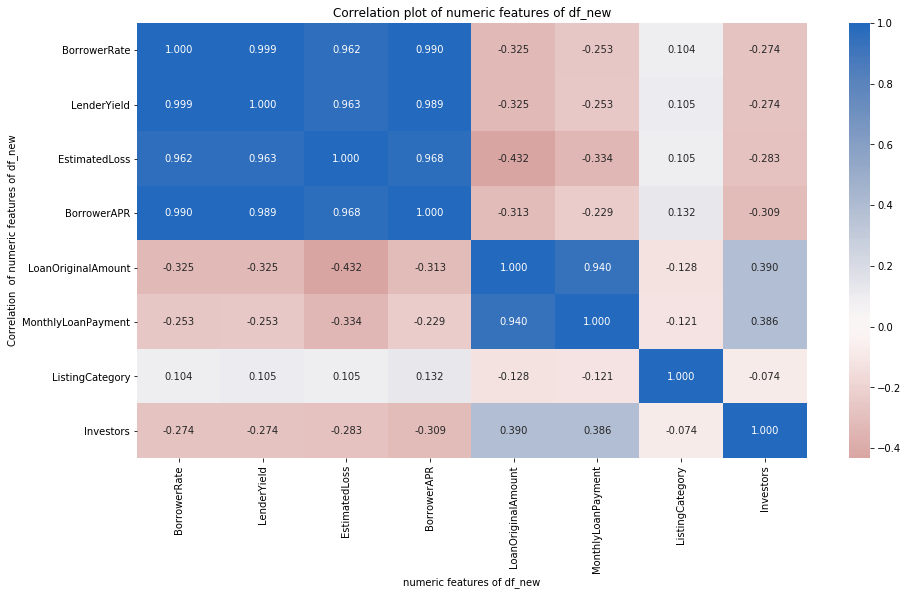

In [53]:
# correlation plot
plt.figure(figsize = [15, 8])
sb.heatmap(df_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.ylabel('Correlation  of numeric features of df_new');
plt.title("Correlation plot of numeric features of df_new")
plt.xlabel('numeric features of df_new')
plt.show();

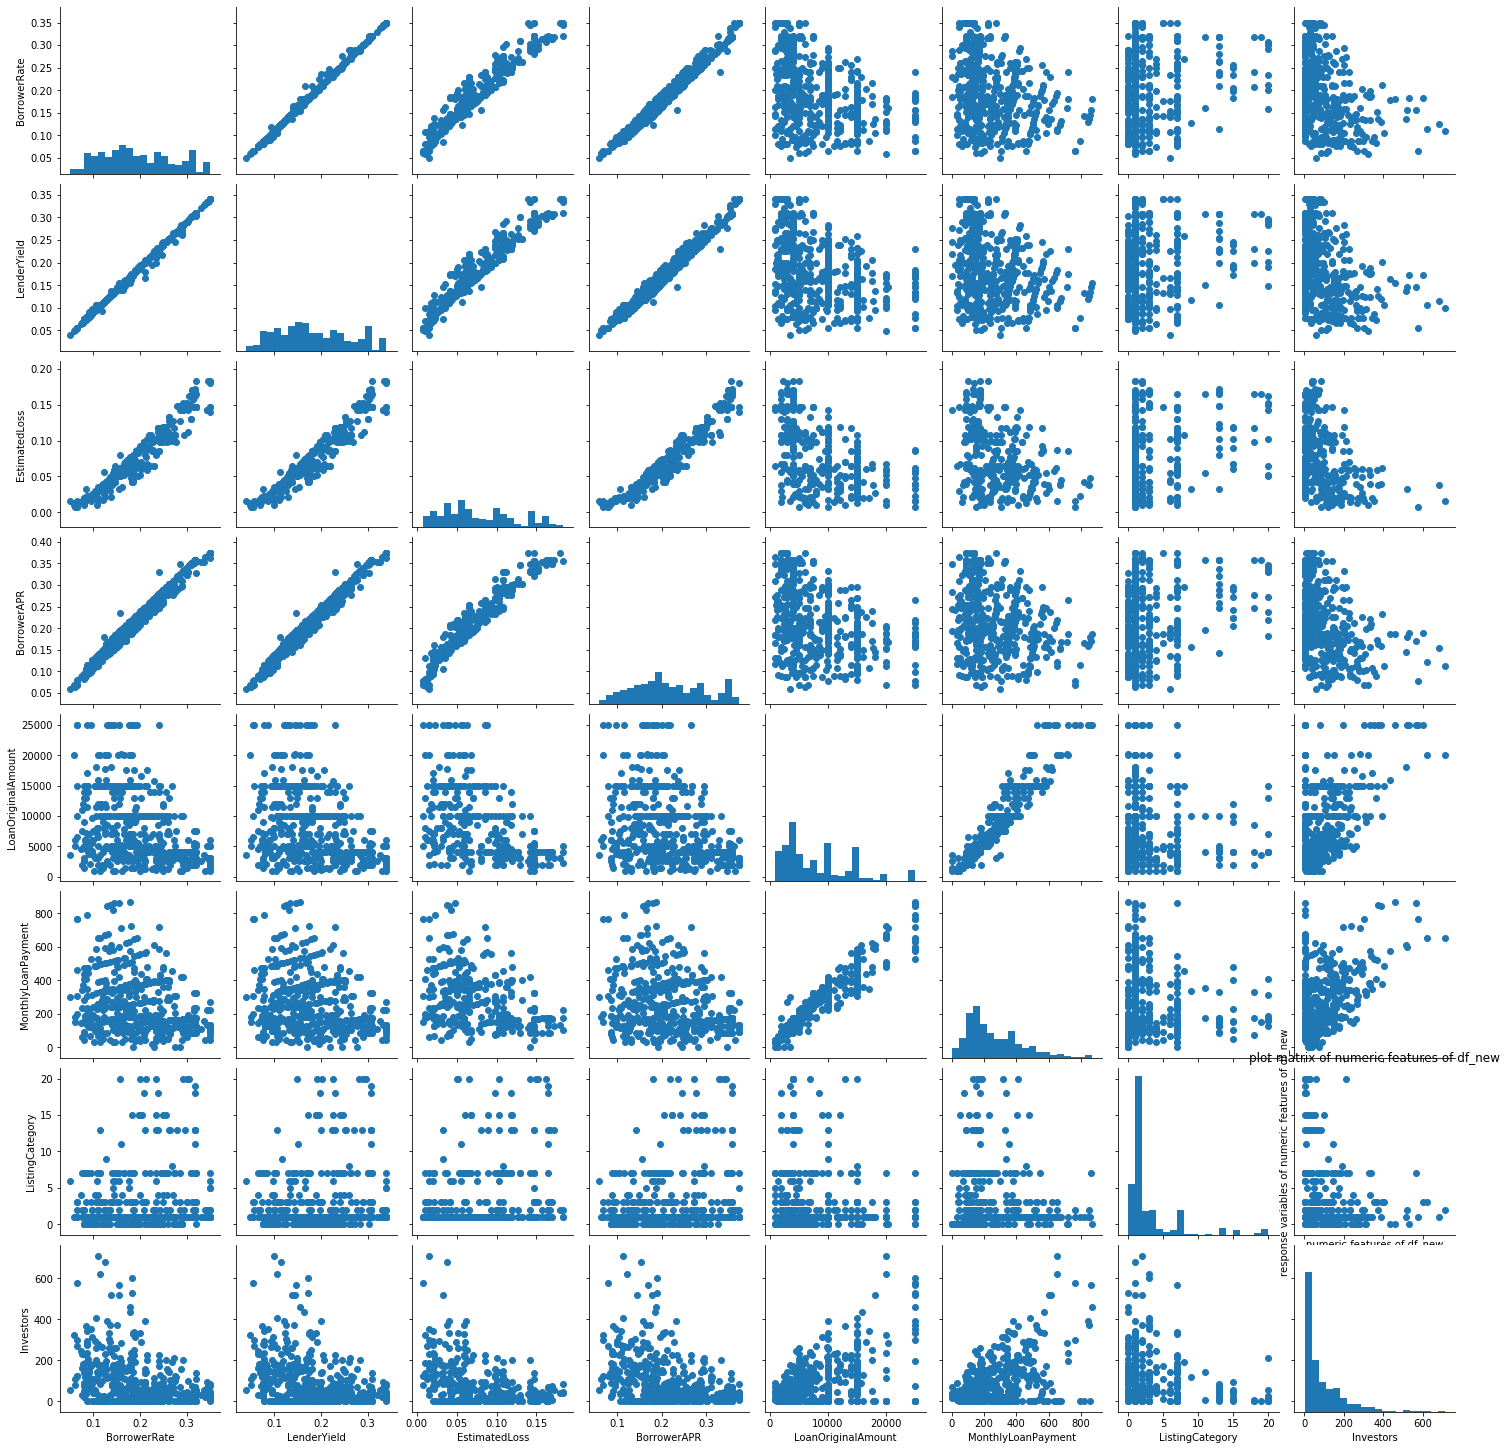

In [54]:
# plot matrix: sample 500 df_new so that plots are clearer and
# they render faster
samples = np.random.choice(df_new.shape[0], 500, replace = False)
df_new_samp = df_new.loc[samples,:]

g = sb.PairGrid(data = df_new_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);
plt.ylabel('response variables of numeric features of df_new')
plt.title("plot matrix of numeric features of df_new")
plt.xlabel('numeric features of df_new')
plt.show();

•	The correlation plot showed that LoanOriginalAmount is highly correlated with MontlyLoanPayment and this should be expected. However, the former is not correlated with any other feature in our distribution.
•	This is in fact a confirmation of the ideology for the ProsperLoan.
•	The LenderYield is observed to be highly correlated with the BorrowerAPR, seeing that the BorrowerAPR is the Borrower's annual percentage rate, it is expected that the LenderYield correlate with it. that is, the more the BorrowerAPR the more yield for the lender.
•	The EestimatedLoss is highly correlated with the BorrowerAPR, the LenderYield, and the BorrowerRate.
•	Given that the BorrowerRate is hinly correlated with the Lenderyield, EstimatedLoss, and BorrowerAPR, i won't perform further analyses with the other variables since they don't look like they'll be of much further interest.

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1440x1080 with 0 Axes>

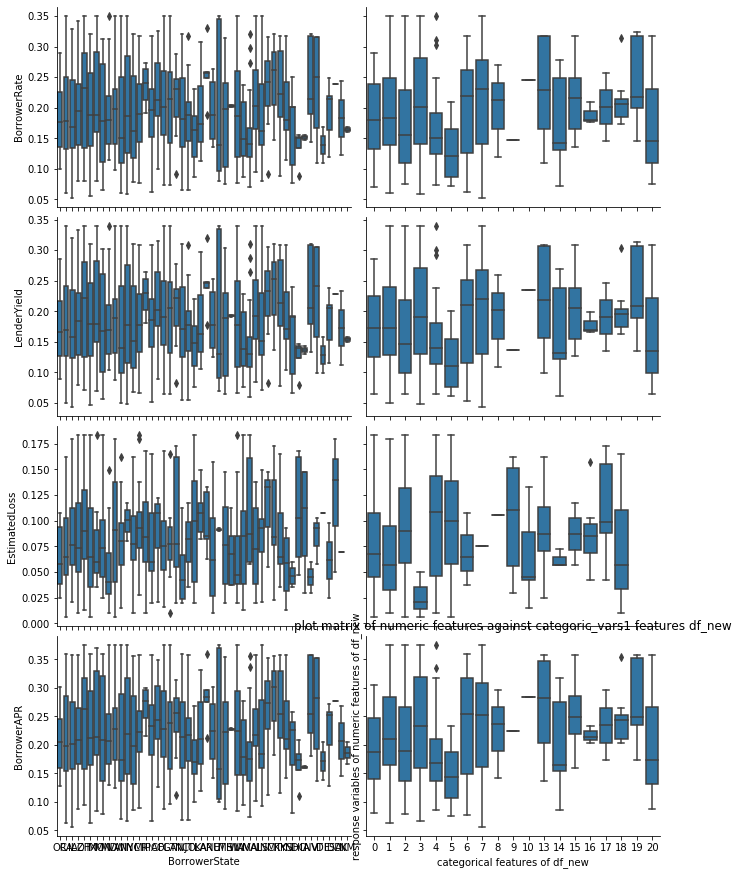

In [55]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_new.shape[0], 1000, replace = False)
df_new_samp = df_new.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 15])
g = sb.PairGrid(data = df_new_samp, y_vars = ['BorrowerRate', 'LenderYield', 'EstimatedLoss','BorrowerAPR'], x_vars = categoric_vars1,
                size = 3, aspect = 1.5);
g.map(boxgrid);
plt.ylabel('response variables of numeric features of df_new');
plt.title("plot matrix of numeric features against categoric_vars1 features df_new")
plt.xlabel('categorical features of df_new')
plt.show();

•	The listing category, like in the correlation plot above, shows no relationship with any of for numeric variables used as the response variables.

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1440x1080 with 0 Axes>

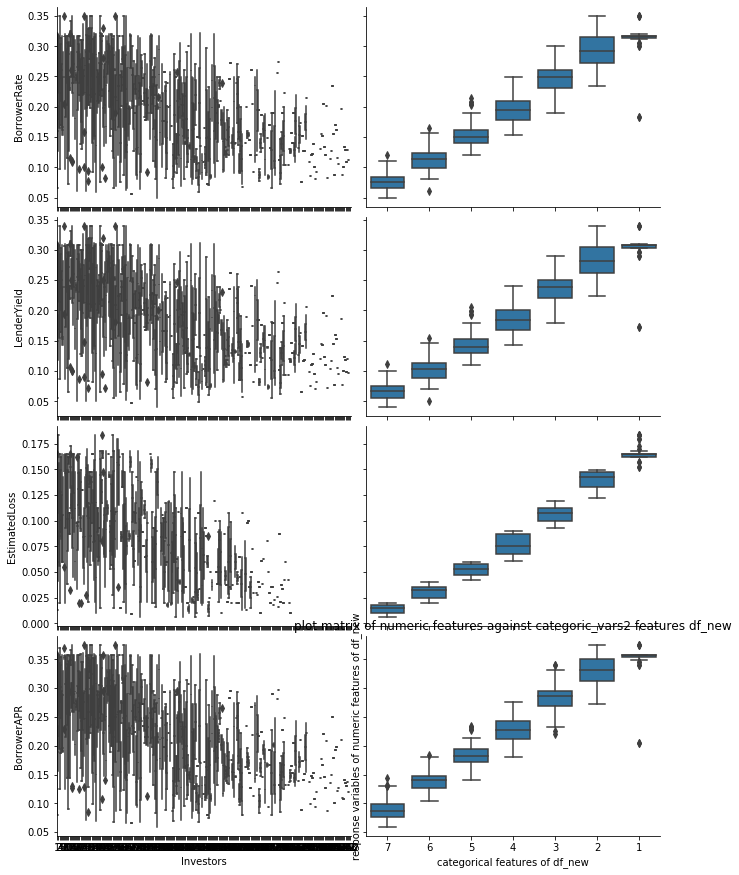

In [56]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_new.shape[0], 1000, replace = False)
df_new_samp = df_new.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 15])
g = sb.PairGrid(data = df_new_samp, y_vars = ['BorrowerRate', 'LenderYield', 'EstimatedLoss','BorrowerAPR'], x_vars = categoric_vars2,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.ylabel('response variables of numeric features of df_new');
plt.title("plot matrix of numeric features against categoric_vars2 features df_new")
plt.xlabel('categorical features of df_new')
plt.show()
plt.show();

•	AS Can be seen in the two sets of boxplots above, the BorrowerState, ListingCategory and Investors don't seem to have any strong correlation with any of the four response variables of BorrowerRate, LenderYield, EstimatedLoss and BorrowerAPR, however, the ProsperRatingNumeric shows a strong negative correlation with all of the response variables. We could see that as the ProsperRatingNumeric drops (increases in the negative) the response variables increase in the positive.

•	Next i will plot the boxplot of the other four categories of ProsperRatingAlpha,EmploymentStatus, IncomeRange and CreditGrade to examine their relationship with the response variables as well.

Some other criteria that could decide how much interest rate is charged are the ProsperRating, EmploymentStatus, incomeRange and CreditGrade. Below we see that as the ProsperRatingAlpha decreases (increasing in the negative towards NC), the BorrowerRate increases. the BorrowerRate for the Retired class of the EmploymentStatus variable is notice to be the least while the BorrowerRate for a group of people whose EmploymentStatus is undefined--Other--is associated with the highest BorrowerRate. Notice also that the BorrowerRate of the four noted working class groups of Employed, Full-time, Self-employed and Part-time is fairly constant on average.

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1440x1080 with 0 Axes>

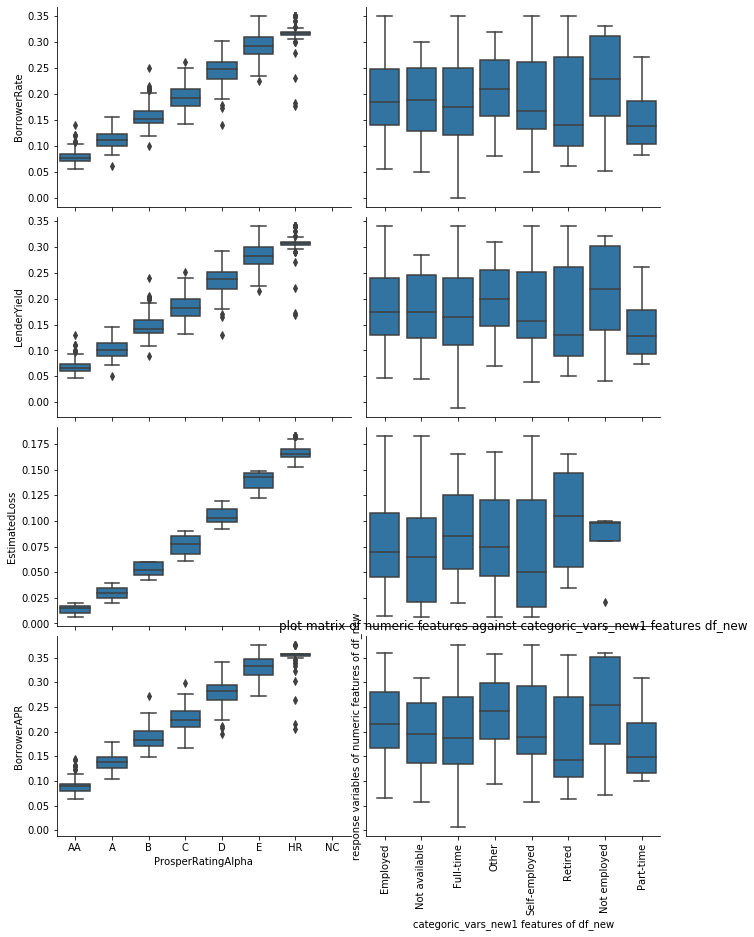

In [57]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_new.shape[0], 2000, replace = False)
df_new_samp = df_new.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 15])
g = sb.PairGrid(data = df_new_samp, y_vars = ['BorrowerRate', 'LenderYield', 'EstimatedLoss','BorrowerAPR'], x_vars = categoric_vars_new1,
                size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90) 
plt.ylabel('response variables of numeric features of df_new');
plt.title("plot matrix of numeric features against categoric_vars_new1 features df_new")
plt.xlabel('categoric_vars_new1 features of df_new')
plt.show();

•	We can see that as the ProsperRatingAlpha decreases (increasing in the negative towards NC), the BorrowerRate increases. the BorrowerRate for the Retired class of the EmploymentStatus variable is notice to be the least while the BorrowerRate for a group of people whose EmploymentStatus is undefined--Other--is associated with the highest BorrowerRate. Notice also that the BorrowerRate of the four noted working class groups of Employed, Full-time, Self-employed and Part-time is fairly constant on average.

Here we see an interesting correlation between BorrowerRate and income range that as one’s income range increase the corresponding borrowerRate decreases

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 3600x1080 with 0 Axes>

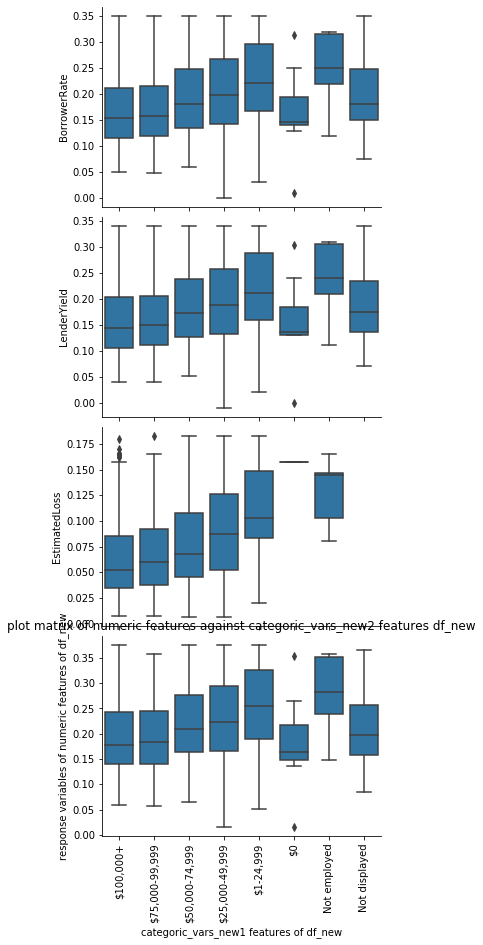

In [58]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_new.shape[0], 2000, replace = False)
df_new_samp = df_new.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [50, 15])
g = sb.PairGrid(data = df_new_samp, y_vars = ['BorrowerRate', 'LenderYield', 'EstimatedLoss','BorrowerAPR'], x_vars = categoric_vars_new2,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.ylabel('response variables of numeric features of df_new')
plt.title("plot matrix of numeric features against categoric_vars_new2 features df_new")
plt.xlabel('categoric_vars_new1 features of df_new')
plt.show();

Interestingly the BorrowerRate appears to decrease with a rise in income range and increases with a drop in income range. This will definitely encourage the working class and strengthen the economy.

 The ProsperRatingAlpha,ProsperRatingNumeric, IncomeRange, and CreditGrade show very strong correlation with BorrowerRate, as theses predictor variables increase, the response--BorrowerAPR—decrease.

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 3600x1080 with 0 Axes>

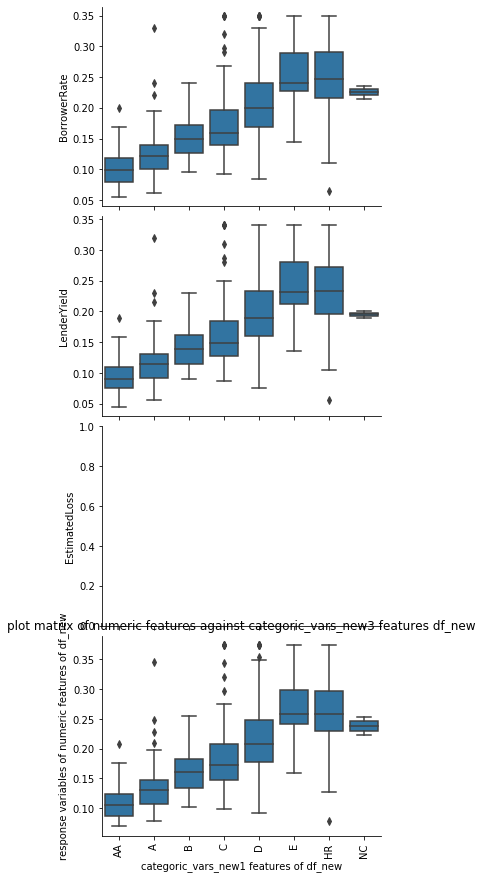

In [59]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df_new.shape[0], 2000, replace = False)
df_new_samp = df_new.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [50, 15])
g = sb.PairGrid(data = df_new_samp, y_vars = ['BorrowerRate', 'LenderYield', 'EstimatedLoss','BorrowerAPR'], x_vars = categoric_vars_new3,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.ylabel('response variables of numeric features of df_new')
plt.title("plot matrix of numeric features against categoric_vars_new3 features df_new")
plt.xlabel('categoric_vars_new1 features of df_new')
plt.show();

•	The ProsperRatingAlpha,ProsperRatingNumeric, IncomeRange, and CreditGrade show very strong correlation with each of the four numeric variables of BorrowerRate, LenderYield, EstimatedLoss and BorrowerAPR however, there is some worth of a relationship with those four numeric variables and EmploymentStatus. However this has to be further investigated.

•	From the boxplot above it becomes even clearer that both prosperRatingNumeric and prosperRatingAlpha have similar correlation with borrowerRate, or any of the other three numeric categories as a result I will use just choose one of the ProsperRatings in the remaining part of the analyses

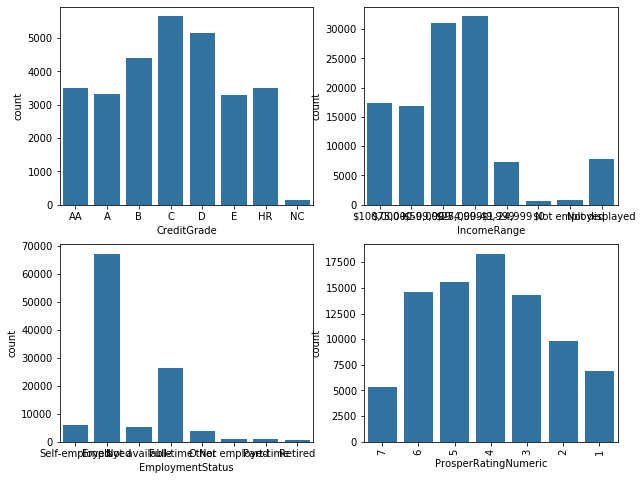

In [60]:
# let's plot for three categorical variable to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=2,   ncols =2,   figsize = [10,8])


default_color = sb.color_palette()[0]
sb.countplot(data = df_new, x = 'CreditGrade', color = default_color, ax = ax[0,0])
sb.countplot(data = df_new, x = 'IncomeRange', color = default_color, ax = ax[0,1])

sb.countplot(data = df_new, x = 'EmploymentStatus', color = default_color, ax = ax[1,0])
sb.countplot(data = df_new, x = 'ProsperRatingNumeric', color = default_color, ax = ax[1,1])

plt.xticks(rotation=90)
plt.show();

Finally, let's look at relationships between the three of remaing categorical features noting that CrditGrade and ProsperRatingNumeric show similar relationship with any of the four nemeric variables, therefre we'll use just oone--CreditGrade   .

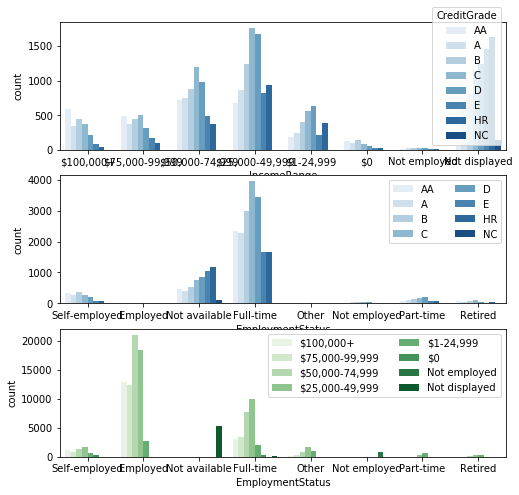

In [61]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = df_new, x = 'IncomeRange', hue = 'CreditGrade', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_new, x = 'EmploymentStatus', hue = 'CreditGrade', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_new, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show();

the creditgrade AA seem top be associated with the fulltime worjers 

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how BorrowerAPR and BorrowerRate are related to one another for all of the data.

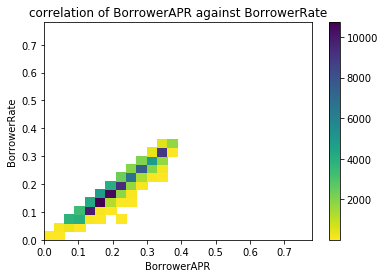

In [62]:
bin_x =np.arange(0, .50+.3, .03) 
bin_y =np.arange(0, .50+.3, .03)

plt.hist2d(data = df_new, x='BorrowerAPR', y='BorrowerRate', cmin =0.5, cmap = 'viridis_r', bins =[bin_x, bin_y])
plt.colorbar()
plt.title("correlation of BorrowerAPR against BorrowerRate")
plt.xlabel('BorrowerAPR')

plt.ylabel('BorrowerRate')
plt.show();

The correlation between BorrowerRate and BorrowerAPR strongly positively correlated

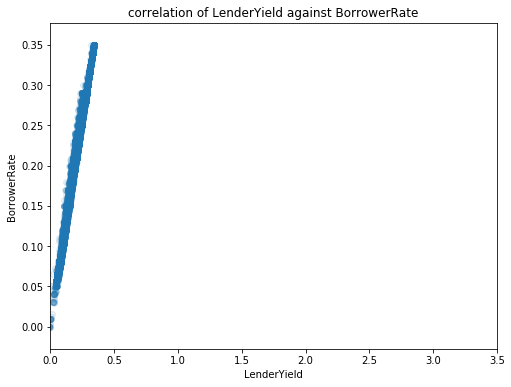

In [63]:
# scatter plot of LenderYield vs. BorrowerRate
plt.figure(figsize = [8, 6])
plt.scatter(data = df_new, x = 'LenderYield', y = 'BorrowerRate', alpha = 1/10)
plt.xlim([0, 3.5])
plt.xlabel('LenderYield')
plt.title("correlation of LenderYield against BorrowerRate")
plt.ylabel('BorrowerRate')
plt.show();

The LenderYield stayed as BorrowerRate increases until BorrowerRate raches a point around 0.5. however, the LenderYield appears to have a ceiling such that further increment in BorrowerRate does not amount to a corresponding LendeYield.

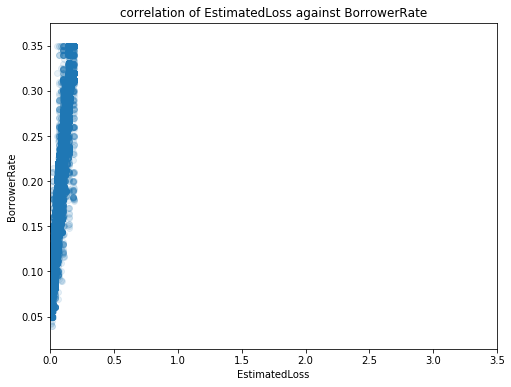

In [64]:
# scatter plot of EstimatedLoss vs. BorrowerRate
plt.figure(figsize = [8, 6])
plt.scatter(data = df_new, x = 'EstimatedLoss', y = 'BorrowerRate', alpha = 1/10)
plt.xlim([0, 3.5])
plt.xlabel('EstimatedLoss')
plt.title("correlation of EstimatedLoss against BorrowerRate")
plt.ylabel('BorrowerRate')
plt.show();

The LenderYield and EstimatedLoss show similar relationship with BorrowerRate

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As can be seen from the above plot, LenderYield BorrowerAPR and EstimatedLoss show strong correlation with BorrowerRate, Surprisingly It was observed that the BorrowerState, ListingCategory and Investors doesn't seem to have any correlation with our four numeric variables of BorrowerRate, LenderYield, EstimatedLoss and BorrowerAPR, t!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>The correlation plot showed that LoanOriginalAmount is highly correlated with MontlyLoanPayment and this should be expected. However, the former is not correlated with any other feature in our distribution. • This is in fact a confirmation of the ideology for the ProsperLoan. • The LenderYield is observed to be highly correlated with the BorrowerAPR, seeing that the BorrowerAPR is the Borrower's annual percentage rate, it is expected that the LenderYield correlate with it. that is, the more the BorrowerAPR the more yield for the lender. • The EestimatedLoss is highly correlated with the BorrowerAPR, the LenderYield, and the BorrowerRate!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Since the audience can interprete borrowerRate in terms of lenderyield, i will therefore continue my investigation of the borrowerRate in terms of the lenderyield.

C:\Users\Max\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


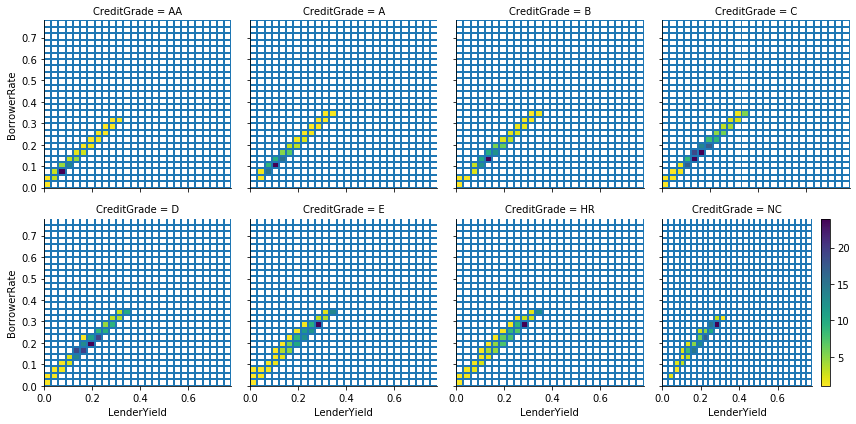

In [65]:
# create faceted heat maps on levels of the 'CreditGrade' variable
bin_x =np.arange(0, .50+.3, .03) 
bin_y =np.arange(0, .50+.3, .03)
g = sb.FacetGrid(data = df_new, col = 'CreditGrade', col_wrap = 4, size = 3)                 
g.map(plt.hist2d, 'LenderYield', 'BorrowerRate', bins =[bin_x,bin_y], cmin=0.5, cmap='viridis_r')
plt.colorbar()
g.set_xlabels('LenderYield')
g.set_ylabels('BorrowerRate')
plt.show();

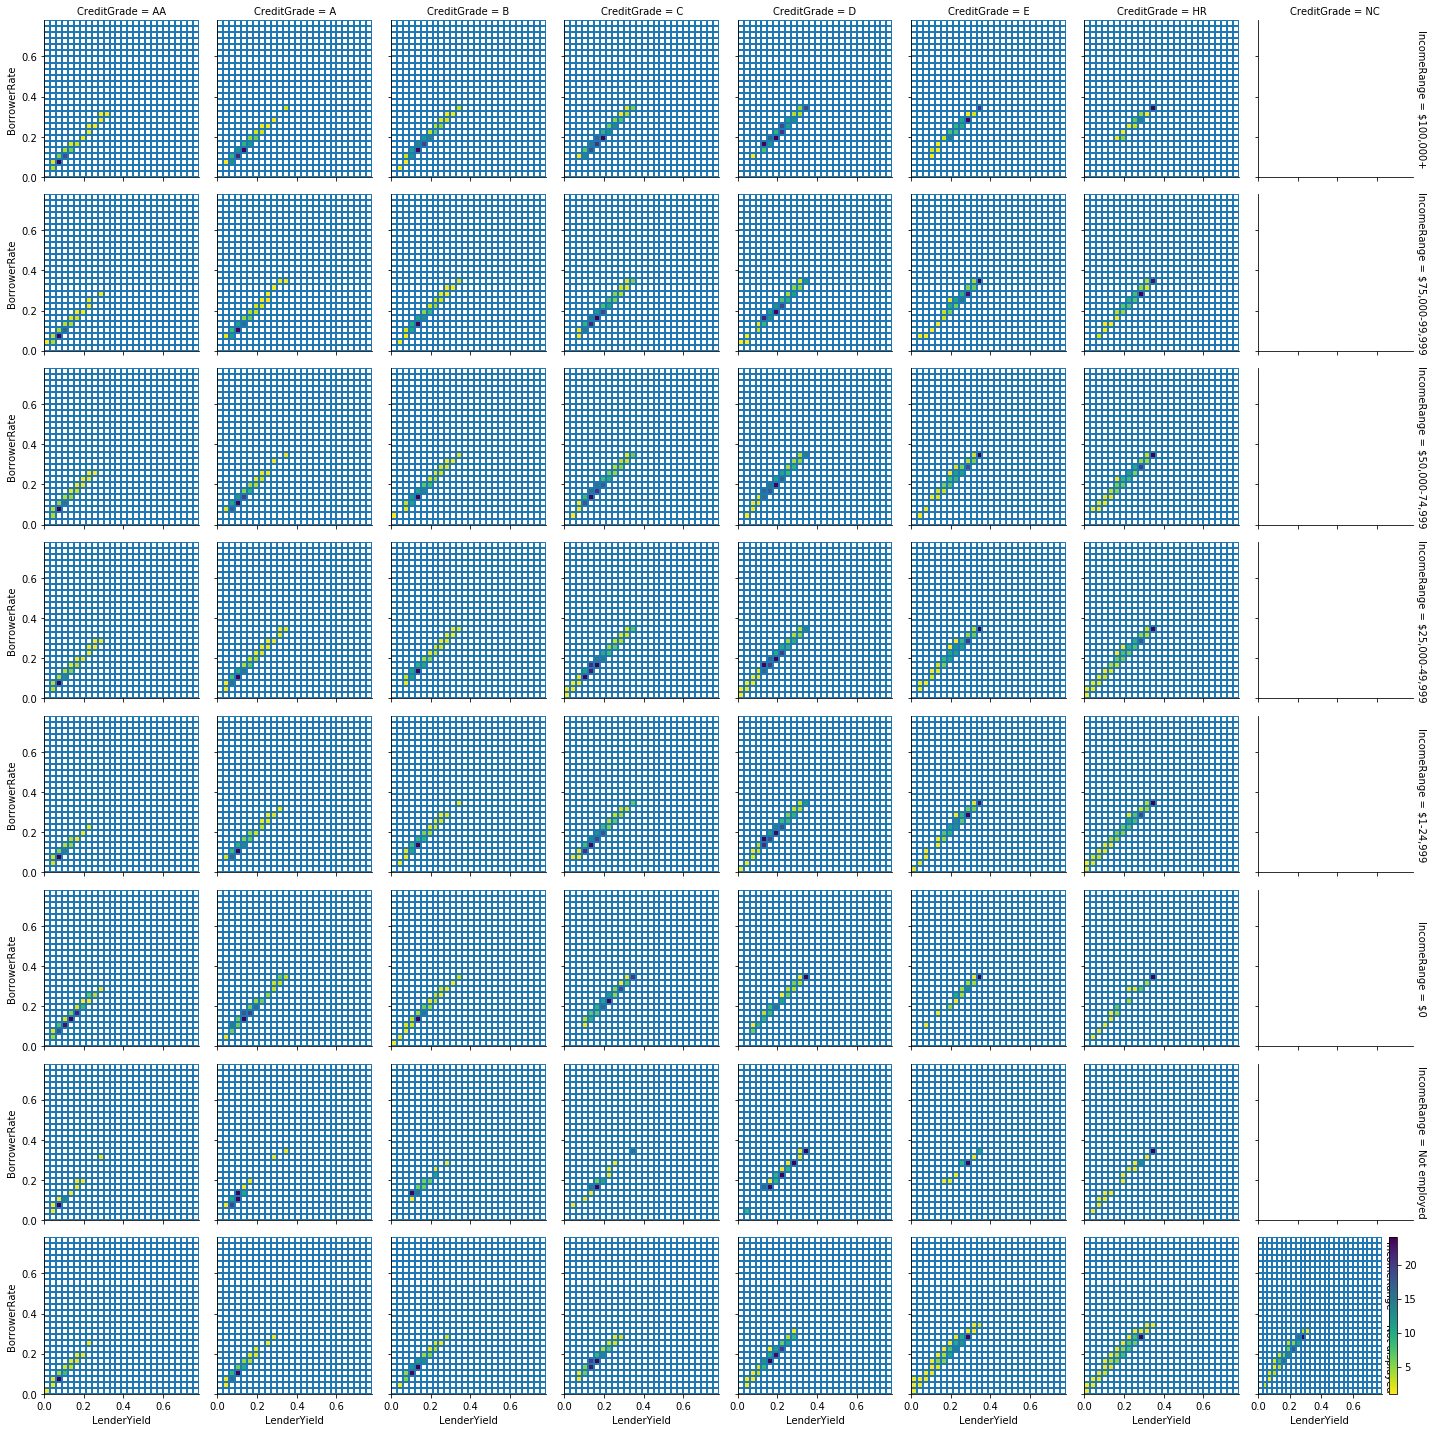

In [66]:
# create faceted heat maps on levels of CreditGrade and EmploymentStatus
bin_x =np.arange(0, .50+.3, .03) 
bin_y =np.arange(0, .50+.3, .03)
g = sb.FacetGrid(data = df_new, col = 'CreditGrade', row = 'IncomeRange', size = 2.5,
                 margin_titles = True)
g.map(plt.hist2d, 'LenderYield', 'BorrowerRate', bins =[bin_x,bin_y], cmin=0.5, cmap='viridis_r')
plt.colorbar()
g.set_xlabels('LenderYield')
g.set_ylabels('BorrowerRate')

plt.show();

I tried looking at a faceted heat map across two vategory dimensions, but it seems like there's too many facets to look at. Perhaps a better summary can come from looking at only BorrowerRate of a specific category.

In [67]:
# select BorrowerRate of approximately .3 
df_flag = (df_new['BorrowerRate'] >= 0.1) & (df_new['BorrowerRate'] <= .4)
df_1c = df_new.loc[df_flag,:]

When the income range was measured against the BorrowersRate in one of the boxplots it was observed that the BorrowerRate decreases with a rise in income range and increases with a drop in income range. However, here we are noticing the very opposite and this is interesting but not expected because at this point one could simply conclude that ProsperLoan is just one of those profit making ventures out there!

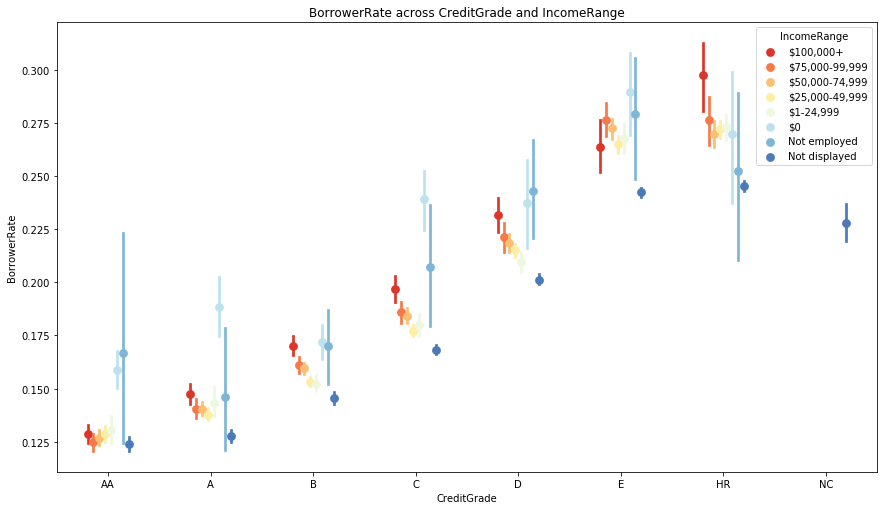

In [68]:
fig = plt.figure(figsize = [14.7,8.27])
ax = sb.pointplot(data = df_1c, x = 'CreditGrade', y = 'BorrowerRate', hue = 'IncomeRange',
           palette = 'RdYlBu', linestyles = '', dodge = 0.4)
plt.title('BorrowerRate across CreditGrade and IncomeRange')
plt.ylabel('BorrowerRate')

plt.show();

1.	The typical borrower rate is increasing as the credit rating falls (interesting and expected), and
2.	Excluding the non-numeric Income ranges, typically the borrower rate is increasing as the income range increases (Interesting, and not expected.

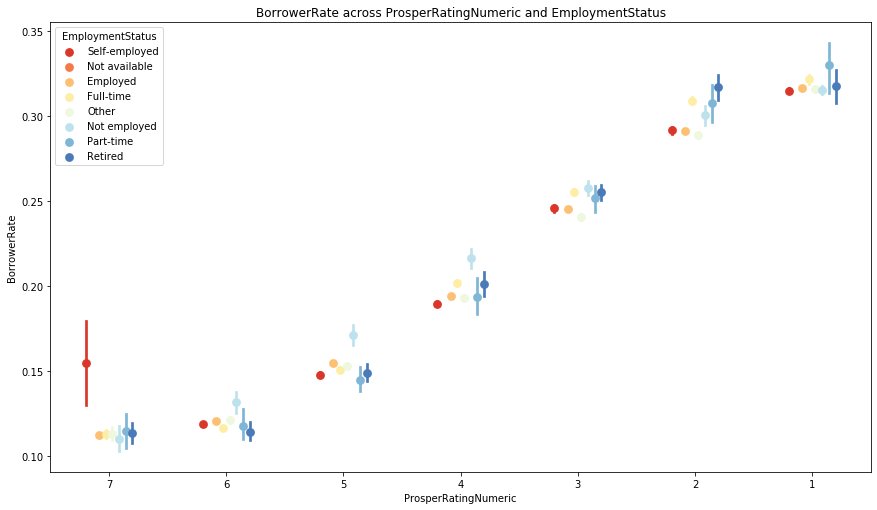

In [69]:
fig = plt.figure(figsize = [14.7,8.27])
ax = sb.pointplot(data = df_1c, x = 'ProsperRatingNumeric', y = 'BorrowerRate', hue = 'EmploymentStatus',
           palette = 'RdYlBu', linestyles = '', dodge = 0.4)
plt.title('BorrowerRate across ProsperRatingNumeric and EmploymentStatus')
plt.ylabel('BorrowerRate')

plt.show();

As ProsperRatingNumeric drops, the BorrowerRate increases.  At the same PropsperRatingNumeric of 7, the self employed have the highest BorrowerRate while at the drop of ProsperRatingNumeric below 7, the self employed, employed and full-time have the least BorrowerRate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The typical borrower rate is increasing as the credit rating falls and while with the exclution of the non-numeric Income ranges, typically the borrower's rate is increasing as the income range increases (Interesting, though not expected!)

### Were there any interesting or surprising interactions between features?

> •	When the income range was measured against the BorrowersRate in one of the boxplots it was observed that the BorrowerRate decreases with a rise in income range and increases with a drop in income range. However, here we are noticing the very opposite and this is interesting but not expected because at this point one could simply conclude that ProsperLoan is just one of those profit making ventures out there!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!